In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import FlatCurver.simulation.PandemicSimulator.PandemicSimulatorMulti as pan

In [97]:
ger_pop = 8*10e7  #german population
ndim = 2
beta = np.array([[1, 3/10, 3], [1/10, 2/10, 1], [0, 0.2, 1]])  # contact rate: given by RKI, a patient is 10 days infectious and infects 2 people during this time
gamma = np.diag([0.97/14, 0.96/14, 0.92/14])  #recovery rate: 0.97 percent survive while the average infection lasts for 14 days
delta = np.diag([0.03/14, 0.04/14, 0.03/14])  #death rate: 1-gamma
N = np.array([0.6*ger_pop, 0.2 * ger_pop, 0.2*ger_pop])

In [98]:
multi_pan = pan.PandemicSimulatorMulti(beta=beta, gamma=gamma, delta=delta, N=N, timesteps=600)

In [99]:
multi_pan.set_y0([N[0]-1, N[1], N[2], 1, 0, 0, 0, 0,0, 0, 0,0])

In [100]:
sol = multi_pan.simulate_SEIR()

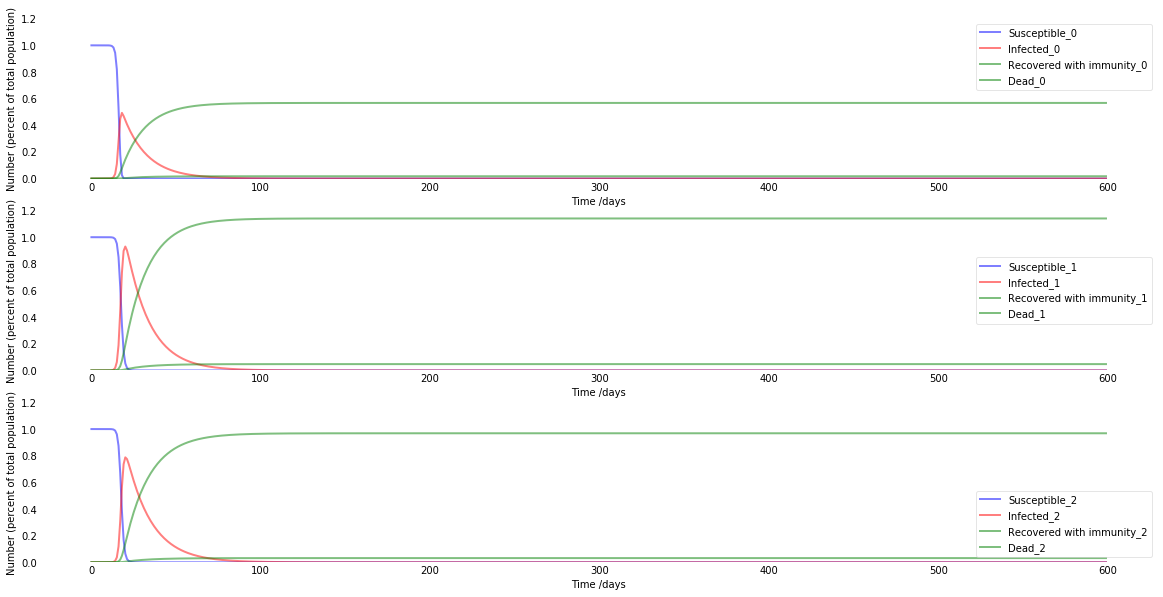

In [101]:
multi_pan.simulate_and_show_results()

In [108]:
col_names = ['A', 'B', 'C']

In [ ]:
        def deriv_multi(t, y):
            S, E, I, R = [y[self.ndim*i:self.ndim*(i+1)] for i in range(4)]
            dSdt = -1*np.dot(self.beta, I/self.N)*S
            dEdt = np.dot(self.delta, I)
            dRdt = np.dot(self.gamma, I)
            dIdt = 1/self.N*np.dot(self.beta, I)*S-dEdt-dRdt
            return [*dSdt, *dEdt, *dIdt, *dRdt]

In [107]:
conditions = ['Susceptible', 'Dead', 'Infectious', 'Recovered']

In [110]:
df = pd.DataFrame(sol.y.T, columns=[f'{cond}_{el}' for cond in conditions for el in col_names])

In [ ]:
df

In [102]:
sol.y

array([[4.79999999e+08, 4.79999997e+08, 4.79999992e+08, ...,
        2.13472797e-12, 2.13472797e-12, 2.13472797e-12],
       [1.60000000e+08, 1.60000000e+08, 1.60000000e+08, ...,
        1.03373337e+00, 1.03373337e+00, 1.03373337e+00],
       [1.60000000e+08, 1.60000000e+08, 1.60000000e+08, ...,
        2.33798374e+00, 2.33798374e+00, 2.33798374e+00],
       ...,
       [0.00000000e+00, 3.56086855e-03, 1.30361733e-02, ...,
        8.42984379e+06, 8.42984379e+06, 8.42984379e+06],
       [0.00000000e+00, 2.12216744e-04, 1.39004181e-03, ...,
        7.60450075e+06, 7.60450075e+06, 7.60450075e+06],
       [0.00000000e+00, 1.21162421e-05, 1.74968413e-04, ...,
        5.05263151e+06, 5.05263151e+06, 5.05263151e+06]])

#### AB HIER SIMULATION DEUTSCHLAND

In [19]:
beta = np.random.rand(16,16)
# make beta symmetric
beta = 1/2*beta + 1/2*beta.T 

In [36]:
einwohner = pd.read_csv('../../data/einwohner_bundeslaender.csv', sep='\t')

In [78]:
ger_pop = 8*10e7  #german population
ndim = 2
beta = np.random.rand(16,16)  # contact rate: given by RKI, a patient is 10 days infectious and infects 2 people during this time
gamma = np.diag(list(np.random.rand(16)/20 + 0.95))  #recovery rate: 0.97 percent survive while the average infection lasts for 14 days
delta = np.diag(list(np.random.rand(16)/100 + 0.03))  #death rate: 1-gamma
N = einwohner['Einwohner'].values

In [91]:
multi_pan = pan.PandemicSimulatorMulti(beta=beta, gamma=gamma, delta=delta, N=N, timesteps=120)

In [92]:
multi_pan.set_y0([*N, *list(np.random.randint(1,1000, 16)),*list([0]*16),*list([0]*16)])

In [83]:
isinstance(np.array([2]), (np.ndarray))

True

In [93]:
sol = multi_pan.simulate_SEIR()

In [94]:
sol.y.shape

(64, 120)

In [ ]:
sol.y

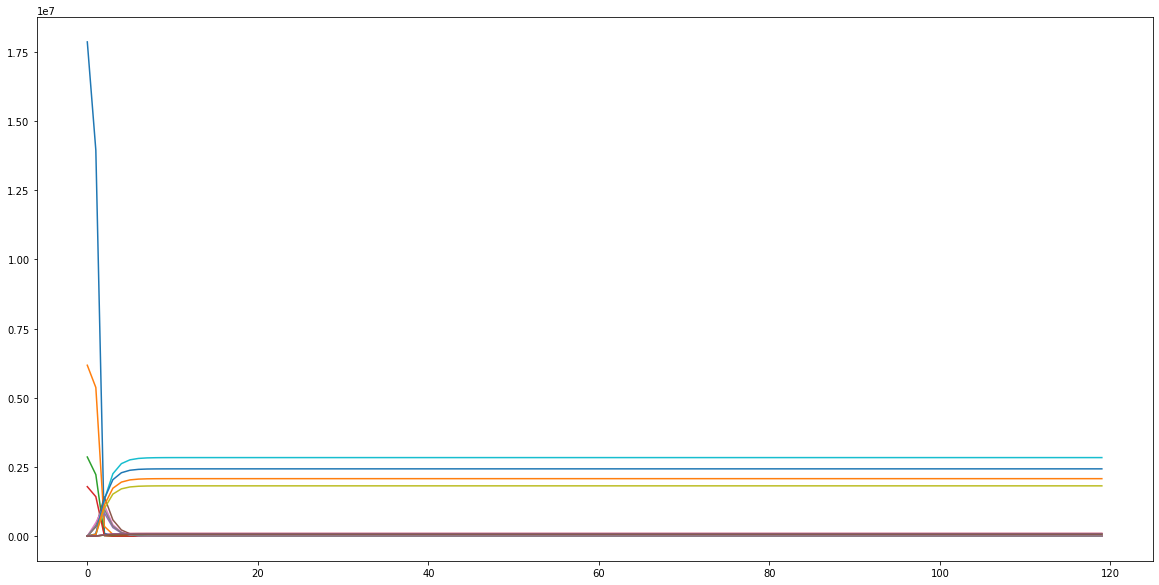

In [96]:
plt.figure(figsize=(20,10))
plt.plot(sol.t, sol.y.T[:,::4])

In [ ]:
for y

In [41]:
[n for n in N]

array([17865516, 12843514, 10879618,  7926599,  6176172,  4084851,
        4052803,  3520031,  2858714,  2484826,  2245470,  2170714,
        1787408,  1612362,   995597,   671489])

In [50]:
np.random.randint(1,1000, 16)

array([291, 836, 756, 940, 454, 372, 583, 233, 639, 352, 444, 999,  35,
       386, 774,   4])

In [51]:
[*N, *list(np.random.randint(1,1000, 16))]

[17865516,
 12843514,
 10879618,
 7926599,
 6176172,
 4084851,
 4052803,
 3520031,
 2858714,
 2484826,
 2245470,
 2170714,
 1787408,
 1612362,
 995597,
 671489,
 761,
 337,
 703,
 422,
 475,
 425,
 912,
 243,
 546,
 855,
 944,
 951,
 592,
 968,
 554,
 922]

In [53]:
[*N, *list(np.random.randint(1,1000, 16)),*list([0]*16),*list([0]*16)]

[17865516,
 12843514,
 10879618,
 7926599,
 6176172,
 4084851,
 4052803,
 3520031,
 2858714,
 2484826,
 2245470,
 2170714,
 1787408,
 1612362,
 995597,
 671489,
 245,
 48,
 908,
 681,
 303,
 834,
 174,
 436,
 883,
 128,
 245,
 284,
 930,
 983,
 389,
 453,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
multi_pan.set_y0([*N, *list(np.random.randint(1,1000),*list([0]*16),*list([0]*16)])